# Learn `QFit` in 10? minutes

Tianpu Zhao, Danyang Chen and Jens Koch

This guide will walk you through the basic usage of `QFit` and its features. We have prepared a simple task for you to practice fitting with `QFit`. Don't worry, we've prepared a detailed guide for you to follow. 

## The fitting task
You are given a superconducting circuit composed of a fluxonium qubit and a resonator. They are coupled by a capacitor. 
<img src="../resources/images/example_circuit.png" width="300">  
The circuit is described by the following Hamiltonian:
$$
H = H_{\rm res} + H_{\rm qubit} + H_{\rm int}
$$
where
\begin{align*}
H_{\rm res} &= E_{\rm osc} a^\dagger a \\
H_{\rm qubit} &= -4E_C n^2 + E_J \cos(\varphi+2\pi\Phi_{\rm ext}/\Phi_0) + \frac{1}{2}E_L\varphi^2 \\
H_{\rm int} &= -i\frac{g}{\sqrt{2}l_{\rm osc}} (a-a^\dagger) n
\end{align*}
where $a$ is the annihilation operator of the resonator, $n$ is the number operator of the qubit, $\varphi$ is the phase operator of the qubit. 
$E_{\rm osc}$ is the resonator frequency, $l_{\rm osc}$ is the oscillator length. $E_C$ is the charging energy, $E_J$ is the Josephson energy, $E_L$ is the inductive energy. 
$g$ is the coupling strength. $\Phi_{\rm ext}$ is the external flux, and $\Phi_0$ is the flux quantum.

To determine the parameter described above, we perform two-tone spectroscopy experiment. We apply a tone with frequency $f_{\rm d}$ to the qubit and a tone with frequency $E_{\rm osc} / h$ to the resonator. We measure the transmission or reflection of the rf signal through the resonator. We perform such measurement for different $f_{\rm d}$ and $\Phi_{\rm ext}$, and obtain the following data:

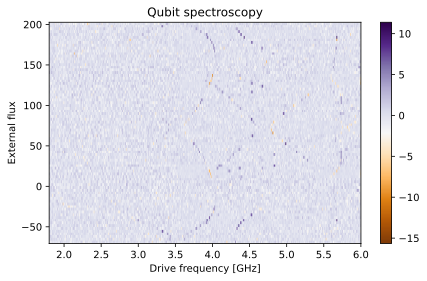

In [25]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
with h5py.File("./../example_data/joint_qubit_twotone.h5", "r") as file:
    data = np.array(file["mags"])
    f_d, Phi_ext = numpy.meshgrid(file["freq"], file["flux"])

# Plot the data
plt.figure(figsize=(7, 4))
plt.pcolormesh(f_d, Phi_ext, data, cmap="PuOr", rasterized=True)
plt.colorbar()
plt.xlabel("Drive frequency [GHz]")
plt.ylabel("External flux")
plt.title("Qubit spectroscopy")
plt.show()


parameter fitting for a capacitively-coupled fluxonium-resonator system with a provided  data. Transition frequencies between two energy eigenstates are represented as peaks in the data.  

In [1]:
import scqubits as scq

In [5]:
scq.GUI()

Container(children=[Sheet(children=[Card(children=[Img(layout=None, src='data:image/png;base64,iVBORw0KGgoAAAA…

1. Perform parameter fitting for a capacitively-coupled fluxonium-resonator system with a provided two-tone spectroscopy data. Transition frequencies between two energy eigenstates are represented as peaks in the data.  
2. Save and load the session.

A rough guess for parameters are provided as follows:
For the fluxonium:
- $EJ$: 3.3
- $EC$: 1.0
- $EL$: 0.23
For the resonator:
- $\phi_0$ (oscillator length): 1.0 (fixed)
- $E_{\mathrm{osc}}$: 7.0 (fixed)

For the coupling (the term is $g n_{\mathrm r} n_{\mathrm{q}}$):
- $g$: 0.1

## Step 1: Data Preparation (no action needed)
Performing a two-tone spectroscopy experiment and arrange it in a proper form. 

In this example, the two-tone spec data is provided by us, stored in "example_data/joint_qubit_twotone.h5"